In [1]:
# Importation des packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import scipy.stats as stats 
import scipy.stats as st
import pingouin as pg
from datetime import date
from scipy.stats import shapiro, ttest_ind, f_oneway, kruskal, kstest, spearmanr


C:\Users\HP 840 G3\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP 840 G3\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#importation des données
df=pd.read_csv("movies.csv")
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Nettoyage des données

Aucours de la visualisation des données nous avons observés que l'année de sortie était différente de l'année de la date de sortie dans certains cas. Nous allons donc créer une nouvelle colonne qui contiendra les vraies années de sortie des films.

In [3]:
# Fonction Python pour extraire l'année de sortie du film de la date de sortie du film.
def extraction_Year(df, column_name, position):
    
    def Corr_Year(phrase):
        if not isinstance(phrase, str):
            return "Valeur invalide"
        mot = phrase.split()
        if position < 1 or position > len(mot):
            return "Position invalide"
        return mot[position - 1]
    
    df[f'Corr_Year_{position}'] = df[column_name].apply(Corr_Year)
    return df

In [4]:
extraction_Year(df,"released", 3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Corr_Year_3
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [5]:
# Recherche des valeurs manquantes
df.isnull().sum()

name              0
rating           77
genre             0
year              0
released          2
score             3
votes             3
director          0
writer            3
star              1
country           3
budget         2171
gross           189
company          17
runtime           4
Corr_Year_3       0
dtype: int64

### Traitement des valeurs manquantes

- Pour la variable **budget** nous allons remplacer les valeurs manquantes par 0. En effet, la présence de valeurs manquantes est du à un non financement du film.
- Pour les  variables quantitatives nous allons remplacer les valeurs manquantes par la moyenne
- Et pour les variables catégorielles nous allons remplacer les valeurs manquantes par le mode.

In [6]:
# Traitement des valeurs manquantes dans le budget
df["budget"].fillna(0, inplace=True)

C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_18992\1815637169.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["budget"].fillna(0, inplace=True)


In [7]:
def traitement_valeurs_manquantes(df, variable):
    if variable not in df.columns:
        raise ValueError(f"La variable '{variable}' n'est pas présente dans le DataFrame.")
    
    if df[variable].dtype == 'object' or df[variable].nunique() < 10:  # Catégorielle
        mode_value = df[variable].mode()[0]  # Calcul du mode
        df[variable].fillna(mode_value, inplace=True)
    else:  # Quantitative
        mean_value = df[variable].mean()  # Calcul de la moyenne
        df[variable].fillna(mean_value, inplace=True)
    return df

In [8]:
# Imputation des valeurs manquantes
df = traitement_valeurs_manquantes(df, 'rating')
df = traitement_valeurs_manquantes(df, 'released')
df = traitement_valeurs_manquantes(df, 'score')
df = traitement_valeurs_manquantes(df, 'writer')
df = traitement_valeurs_manquantes(df, 'star')
df = traitement_valeurs_manquantes(df, 'country')
df = traitement_valeurs_manquantes(df, 'gross')
df = traitement_valeurs_manquantes(df, 'company')
df = traitement_valeurs_manquantes(df, 'runtime')
df = traitement_valeurs_manquantes(df, 'votes')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7668 non-null   object 
 1   rating       7668 non-null   object 
 2   genre        7668 non-null   object 
 3   year         7668 non-null   int64  
 4   released     7668 non-null   object 
 5   score        7668 non-null   float64
 6   votes        7668 non-null   float64
 7   director     7668 non-null   object 
 8   writer       7668 non-null   object 
 9   star         7668 non-null   object 
 10  country      7668 non-null   object 
 11  budget       7668 non-null   float64
 12  gross        7668 non-null   float64
 13  company      7668 non-null   object 
 14  runtime      7668 non-null   float64
 15  Corr_Year_3  7668 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory usage: 958.6+ KB


C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_18992\960547425.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(mode_value, inplace=True)
C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_18992\960547425.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [9]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
Corr_Year_3     object
dtype: object

Il semble avoir des problèmes avec les types de nos données, nous allons les corriger.

In [10]:
df["votes"]=df["votes"].astype('float64')
df["gross"]=df["gross"].astype('float64')
df["budget"]=df["budget"].astype('float64')
df["year"]=df["year"].astype('object')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Corr_Year_3
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,4.699877e+07,Warner Bros.,146.000000,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,5.885311e+07,Columbia Pictures,104.000000,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,5.383751e+08,Lucasfilm,124.000000,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,8.345354e+07,Paramount Pictures,88.000000,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,3.984634e+07,Orion Pictures,98.000000,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.100000,1.800000e+01,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,7.850054e+07,Universal Pictures,90.000000,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,7.850054e+07,Cactus Blue Entertainment,90.000000,2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,7.850054e+07,Embi Productions,107.261613,2020
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.390411,8.810850e+04,James Randall,James Randall,Christina Roz,United States,15000.0,7.850054e+07,Universal Pictures,120.000000,2020


### Recherche des doublons

In [11]:
# Recherche des doublons
df.duplicated(keep=False).sum()

0

In [12]:
df["profit"]=df["gross"]-df["budget"]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Corr_Year_3,profit
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,4.699877e+07,Warner Bros.,146.000000,1980,2.799877e+07
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,5.885311e+07,Columbia Pictures,104.000000,1980,5.435311e+07
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,5.383751e+08,Lucasfilm,124.000000,1980,5.203751e+08
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,8.345354e+07,Paramount Pictures,88.000000,1980,7.995354e+07
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,3.984634e+07,Orion Pictures,98.000000,1980,3.384634e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.100000,1.800000e+01,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,7.850054e+07,Universal Pictures,90.000000,2020,7.849354e+07
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,7.850054e+07,Cactus Blue Entertainment,90.000000,2020,7.850054e+07
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,7.850054e+07,Embi Productions,107.261613,2020,7.844179e+07
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.390411,8.810850e+04,James Randall,James Randall,Christina Roz,United States,15000.0,7.850054e+07,Universal Pictures,120.000000,2020,7.848554e+07


## Analyse Exploratoire des données (EDA)

### Analyse descriptive des variables quantitatives

Cette analyse nous permet d'avoir des information sur les paramètres de position et de dispertion.

In [13]:
round(df.describe())

,score,votes,budget,gross,runtime,profit
count,7668.0,7668.0,7668.0,7.668000e+03,7668.0,7.668000e+03
mean,6.0,88109.0,25513504.0,7.850054e+07,107.0,5.298704e+07
std,1.0,163292.0,38589540.0,1.636697e+08,19.0,1.373608e+08
min,2.0,7.0,0.0,3.090000e+02,55.0,-1.580311e+08
25%,6.0,9100.0,0.0,4.681151e+06,95.0,1.042240e+05
50%,6.0,33000.0,12000000.0,2.141330e+07,104.0,8.828456e+06
75%,7.0,93000.0,32000000.0,7.850054e+07,116.0,5.165048e+07
max,9.0,2400000.0,356000000.0,2.847246e+09,366.0,2.610246e+09


### Analyse descriptive sur les variables catégorielle

In [14]:
df.describe(include=[object])

,name,rating,genre,year,released,director,writer,star,country,company,Corr_Year_3
count,7668,7668,7668,7668,7668,7668,7668,7668,7668,7668,7668
unique,7512,12,19,41,3414,2949,4535,2814,59,2385,46
top,Nobody's Fool,R,Comedy,2000,"February 14, 1986 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures,2019
freq,3,3774,2245,200,11,38,40,44,5478,394,227


## Analyse des corrélations.

###  Budget vs. gross : Le budget a-t-il un impact direct sur les chiffre d'affaire  ?

#### Visualisation graphique Budget vs. gross

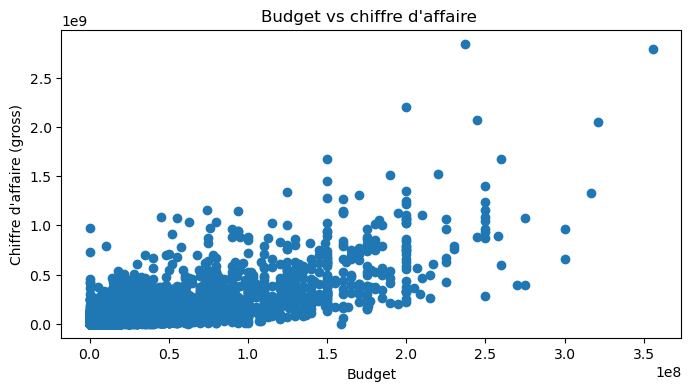

In [15]:
# graphique budget vs gross
plt.figure(figsize=(8,4))
plt.scatter(df["budget"],df["gross"])
plt.title("Budget vs chiffre d'affaire ")
plt.xlabel('Budget')
plt.ylabel("Chiffre d'affaire (gross)")
plt.show()

**Observation graphique**

En observant ce graphique, nous constatons que le chiffre d'affaire  (gross) évolut  en meme temps que le budget de façon linéaire. Ce qui peut nous laisser pensé qu'il existe une corrélation linéaire entre le budget et le chiffre d'affaire du film .

**Vérifions cette hypothèse de corrélation linéaire entre le budget et le chiffre d'affaire à l'aide d'un test statistique**.


P_valeur de la normalité (Kolmogorov-Smirnov)-,budget KstestResult(statistic=0.7168753260302556, pvalue=0.0)
P_valeur de la normalité (Kolmogorov-Smirnov)-gross KstestResult(statistic=1.0, pvalue=0.0)


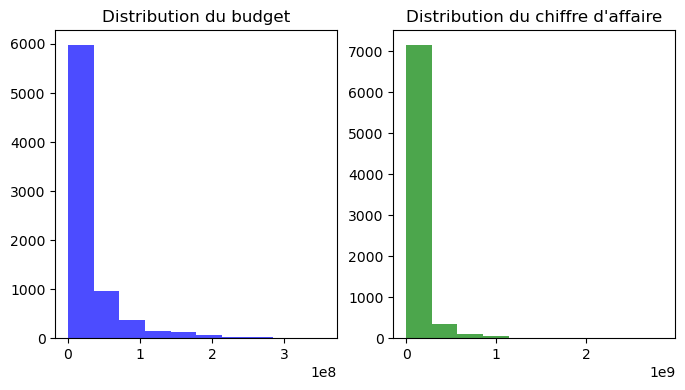

In [16]:
# Test de normalité de Kolmogorov-Smirnov
budget_p_value=kstest(df['budget'], 'norm')
gross_p_value=kstest(df['gross'], 'norm')
print("P_valeur de la normalité (Kolmogorov-Smirnov)-,budget",budget_p_value)
print("P_valeur de la normalité (Kolmogorov-Smirnov)-gross",gross_p_value)

# Histogramme pour vérifier la normalité

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(df['budget'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution du budget')

plt.subplot(122)
plt.hist(df['gross'], bins=10, color='green', alpha=0.7)
plt.title("Distribution du chiffre d'affaire")
plt.show()

De cette analyse, il en resort que la distribution des deux variables quantitatives n'est pas normale. Par conséquent, nous allons utiliser un test statistique non paramétrique.

Nous sommes en présence de deux  variables quantitatives  qui ne sont pas distribuées normalement, le test non paramétrique approprié dans ce cas est le test de corrélation de Spearman.


In [17]:
correlation, p_value = spearmanr(df['budget'], df['gross'])

print(f"Spearman's rank correlation: {correlation}")
print(f"P-value: {p_value}")


Spearman's rank correlation: 0.6717829146221929
P-value: 0.0


**Synthèse des résultats**

On obtient un coéfficient de corrélation de Spearman de 0.67, ce qui montre l'existence d'une forte corrélation linéaire positive entre le budget  et le chiffre d'affaire(gross) du film.
De plus, la p_valeur est inférieure à 0.5.
On rejette donc l'hypothèse nulle, par conséquent il existe une relation monotone entre les deux variables.

### Notes des critiques(score) vs. gross : Les films bien notés ont-ils un avantage financier ?

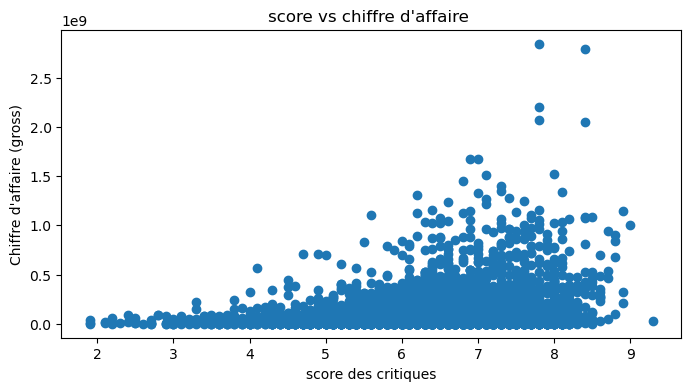

In [18]:
# graphique score vs gross
plt.figure(figsize=(8,4))
plt.scatter(df["score"],df["gross"])
plt.title("score vs chiffre d'affaire ")
plt.xlabel('score des critiques')
plt.ylabel("Chiffre d'affaire (gross)")
plt.show()

P_valeur de la normalité (Kolmogorov-Smirnov)-,score KstestResult(statistic=0.9950042962457818, pvalue=0.0)
P_valeur de la normalité (Kolmogorov-Smirnov)-gross KstestResult(statistic=1.0, pvalue=0.0)


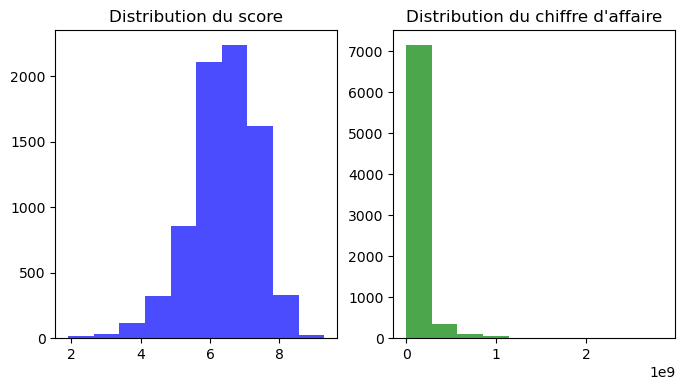

In [19]:
# Test de normalité de Kolmogorov-Smirnov
score_p_value=kstest(df['score'], 'norm')
gross_p_value=kstest(df['gross'], 'norm')
print("P_valeur de la normalité (Kolmogorov-Smirnov)-,score",score_p_value)
print("P_valeur de la normalité (Kolmogorov-Smirnov)-gross",gross_p_value)

# Histogramme pour vérifier la normalité

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(df['score'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution du score')

plt.subplot(122)
plt.hist(df['gross'], bins=10, color='green', alpha=0.7)
plt.title("Distribution du chiffre d'affaire")
plt.show()

De cette analyse, il en resort que la distribution des deux variables quantitatives n'est pas normale. Par conséquent, nous allons utiliser un test statistique non paramétrique.

Nous sommes en présence de deux  variables quantitatives  qui ne sont pas distribuées normalement, le test non paramétrique approprié dans ce cas est le test de corrélation de Spearman.


In [20]:
correlation, p_value = spearmanr(df['score'], df['gross'])

print(f"Spearman's rank correlation: {correlation}")
print(f"P-value: {p_value}")


Spearman's rank correlation: 0.11796102803309344
P-value: 3.614280352971066e-25


**Synthèse des résultats**

On obtient un coéfficient de corrélation de Spearman de 0.117, ce qui montre l'existence d'une faible corrélation linéaire positive entre le score  et le chiffre d'affaire(gross) du film.
De plus, la p_valeur est inférieure à 0.5.
On rejette donc l'hypothèse nulle, par conséquent il existe une relation monotone entre les deux variables .

## Genre du film vs. profit : Quels genres génèrent le plus de bénéfices ?

Création de la variable  **star category** (catégorie de star) qui groupe les stars en fonction du nombre d'apparition dans un film.

In [21]:
# Compter le nombre d'apparitions de chaque nom
nom_counts = df['star'].value_counts()

# Fonction pour déterminer la catégorie en fonction du nombre d'apparitions
def determiner_categorie(count):
    if 30 <= count and count <= 50:
        return "legende"
    elif 20 <= count and count < 30:
        return "super star"
    elif 10 <= count and count < 20:
        return "star montante"
    else:
        return "star"
df['Categorie'] = df['star'].map(nom_counts).apply(determiner_categorie)
print(df)
    

                                                name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life      R      Drama  2020   
7664                                     Dream Round      R     Comedy  2020   
7665                                   Saving Mbango      R      Drama  2020   
7666                                    It's Just Us      R      Drama  2020   
7667                                       Tee em el      R     Horror  2020   

                              released 

In [22]:
df.unique

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
# Visualisation graphique
plt.figure(figsize=(8,6))
sns.boxplot(x='Categorie', y='profit', data=df)
plt.ylabel("Profit")
plt.xlabel("Catégorie de star")
plt.title("Profit par catégoprie de star")
plt.show()

**Observation des graphiques**

L'analyse  graphique revèle   une différence entre  les répartitions du profit par Categorie de star, ce qui nous laisse penser qu'il y a une différence entre la répartition des profit des catégorie de star. 
<br/>Les répartitions sont  inégales !

**Vérifions nos observation à l'aide de Test Statistique**

#### Séparation des groupes

In [ ]:
# Séparation des groupes
C=df[df['Categorie']=='star montante']['profit']
B=df[df['Categorie']=='super star']['profit']
A=df[df['Categorie']=='legende']['profit']
D=df[df['Categorie']=='star']['profit']


In [ ]:
# Test de normalité des groupe au sein de la variable qualitative.
A_p_value=shapiro(A)
B_p_value=shapiro(B)
C_p_value=shapiro(C)
D_p_value=shapiro(D)

print("P_valeur de la normalité (shapiro_wilk)-A", A_p_value )
print("P_valeur de la normalité (shapiro_wilk)-B",B_p_value)
print("P_valeur de la normalité (shapiro_wilk)-C", C_p_value )
print("P_valeur de la normalité (shapiro_wilk)-D",D_p_value )


In [ ]:

# Histogramme pour vérifier la normalité

plt.figure(figsize=(8,4))
plt.subplot(141)
plt.hist(A, bins=10, color='blue', alpha=0.7)
plt.title('légende')

plt.subplot(142)
plt.hist(B, bins=10, color='green', alpha=0.7)
plt.title('Super star')

plt.subplot(143)
plt.hist(C, bins=10, color='red', alpha=0.7)
plt.title('star montante')

plt.subplot(144)
plt.hist(D, bins=10, color='yellow', alpha=0.7)
plt.title('star')

De cette analyse, il en resort que la distribution des différents groupes qui constituent la variable qualitative "Categorie" n'est pas normale. Par conséquent, nous allons utiliser un test statistique non paramétrique.

Nous sommes en présence d'une variable qualitative qui comprend 4 modalités, le test non paramétrique approprié dans ce cas est le test H de Kruskal-Wallis.


In [ ]:
# test de Kruskal-Wallis
kruskal_stat, kruska_p_value =kruskal(A,B,C,D)
print("Statistique H de Kruskal-Wallis :",kruskal_stat)
print("p_valeur (Kruskal-Wallis) :",kruska_p_value)

**Synthèse**

<br/> On obtient la Statistique H de Kruskal-Wallis d'environ 161 et une p-value inférieure à 0,05.
<br/> On rejette l'hypothèse nulle, par conséquent il existe une différence différence significative  entre les médianes des différents groupes!

### Genre du film vs. Rentabilité : Quels genres génèrent le plus de bénéfices ?

In [ ]:
# Visualisation graphique
plt.figure(figsize=(10,12))
plt.barh(df['genre'], df['profit'])
plt.ylabel("Profit")
plt.xlabel("Catégorie de star")
plt.title("Profit par catégoprie de star")
plt.show()